<a href="https://colab.research.google.com/github/anshuiitb/pytorch/blob/main/torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch

In [39]:

import numpy as np
np = np.random.rand(3,4)
np

array([[0.36464302, 0.84785159, 0.7570255 , 0.29714777],
       [0.69829336, 0.58696358, 0.98697021, 0.76262183],
       [0.59368053, 0.83658739, 0.20117087, 0.80216835]])

In [5]:
np.dtype

dtype('float64')

In [19]:
tensor = torch.rand(3,4)
tensor

tensor([[0.6829, 0.9829, 0.6268, 0.3526],
        [0.6710, 0.8218, 0.3285, 0.8557],
        [0.0914, 0.9276, 0.5818, 0.5456]])

In [16]:
tensor = torch.tensor(np)

In [17]:
tensor

tensor([[0.8473, 0.5486, 0.4897, 0.7498],
        [0.8067, 0.6665, 0.1211, 0.1356],
        [0.7646, 0.9210, 0.0066, 0.0583]], dtype=torch.float64)

In [20]:
my_torch = torch.arange(10)
my_torch

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
#reshape and view
my_torch = my_torch.reshape(2,5)
my_torch

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [26]:
#reshape also if we don't know the item range , using -1
my_torch2= torch.arange(15)
my_torch2 = my_torch2.reshape(-1 ,3)
my_torch2

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]])

In [27]:
my_torch3 = torch.arange(10)
my_torch3

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
my_torch4 = my_torch3.view(-1,5)
my_torch4

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [32]:
#with reshape and view , they will update

In [33]:
#slices , grab a section of your tensor
my_torch5 = torch.arange(10)
my_torch5

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [34]:
my_torch5[7]

tensor(7)

In [37]:
my_torch6 = my_torch5.reshape(5,2)
my_torch6

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [38]:
my_torch6[:,1]

tensor([1, 3, 5, 7, 9])

In [39]:
my_torch6[:,1:]

tensor([[1],
        [3],
        [5],
        [7],
        [9]])

In [40]:
tensor_a = torch.tensor([1,2,3,4])
tensor_b = torch.tensor([5,6,7,8])

In [41]:
tensor_a + tensor_b

tensor([ 6,  8, 10, 12])

In [45]:
tensor_a / tensor_b # ** power


tensor([0.2000, 0.3333, 0.4286, 0.5000])

In [ ]:
tensor_a.add_(tensor_b) # permanent changes in tensor_a

simple NN

In [179]:
import os
import json
import torch
!pip install kaggle


In [180]:
kaggle_directory = json.load(open('kaggle.json'))
os.environ["KAGGLE_USERNAME"] = kaggle_directory["username"]
os.environ["KAGGLE_KEY"] = kaggle_directory["key"]

In [181]:
import kaggle
kaggle.api.dataset_download_files('uciml/iris', path='./data', unzip=True)


Dataset URL: https://www.kaggle.com/datasets/uciml/iris


In [182]:
!ls

data  kaggle.json  sample_data


In [183]:
import pandas as pd

df = pd.read_csv('/content/data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [185]:
import torch.nn as nn
import torch.nn.functional as F

In [186]:
class Model(nn.Module):
  def __init__(self , in_features = 5, h1 = 8 , h2 = 9 , out_features = 3):
    super().__init__()
    self.fc1 = nn.Linear(in_features , h1)
    self.fc2 = nn.Linear(h1 , h2)
    self.out = nn.Linear(h2 , out_features)


  def forward(self , x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [187]:
torch.manual_seed(41)
model = Model()

In [188]:
import matplotlib.pyplot as plt
%matplotlib inline

In [189]:
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [190]:
df["Species"] =df["Species"].replace("Iris-setosa", 0)

df["Species"] =df["Species"].replace("Iris-versicolor" , 1)

df["Species"]  = df["Species"].replace("Iris-virginica" , 2)

/tmp/ipython-input-190-671949655.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Species"]  = df["Species"].replace("Iris-virginica" , 2)


In [191]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


In [192]:
x = df.drop("Species" , axis =1)
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [193]:
y = df["Species"]
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [194]:
x = x.values
y=y.values

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
X_train , X_test, y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 41)

In [197]:
print(type(y_train))
print(y_train.dtype)
print(y_train[:5])

<class 'numpy.ndarray'>
int64
[1 1 2 1 2]


In [198]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [199]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters() , lr = 0.01)

In [200]:
epochs = 100
losses = []

In [201]:
for i in range(epochs):
  #get a predict
  y_pred=model.forward(X_train)
  #measure loss
  loss = criterion(y_pred , y_train)
  #keep track of our losses
  losses.append(loss.detach().numpy())


  #print every 10 epoch

  if i % 10 ==0 :
    print(f'Epoch : {i} and loss: {loss}')


  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch : 0 and loss: 7.577073574066162
Epoch : 10 and loss: 1.6074634790420532
Epoch : 20 and loss: 0.7286178469657898
Epoch : 30 and loss: 0.5995004177093506
Epoch : 40 and loss: 0.49728840589523315
Epoch : 50 and loss: 0.4133799970149994
Epoch : 60 and loss: 0.34648123383522034
Epoch : 70 and loss: 0.2871796190738678
Epoch : 80 and loss: 0.23776064813137054
Epoch : 90 and loss: 0.1985846310853958


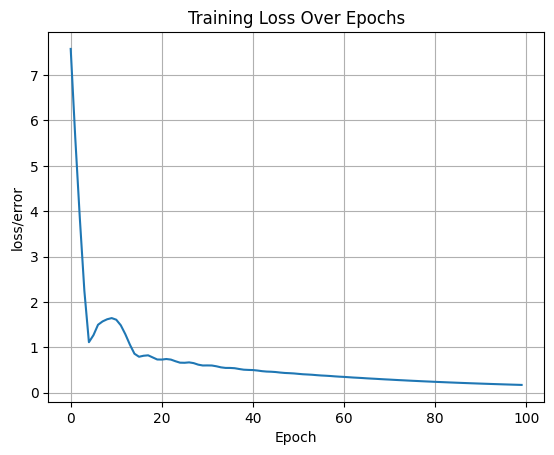

In [202]:
# Now plot
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")
plt.title("Training Loss Over Epochs")
plt.grid(True)
plt.show()

In [203]:
# model evaluation
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval , y_test)

In [204]:
loss

tensor(0.1625)

In [207]:
correct = 0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val = model.forward(data)
    print(f'{i+1:2}. {str(y_val):38} \t {y_test[i]}')

    if y_val.argmax().item() == y_test[i]:
      correct +=1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):7.3f}% correct')

 1. tensor([-2.8430, 12.1168, 14.7183])    	 2
 2. tensor([-3.2506, 13.0572, 16.0658])    	 2
 3. tensor([-2.9681, 13.6527, 16.2356])    	 2
 4. tensor([0.0733, 8.7581, 8.0513])       	 1
 5. tensor([-1.6845, 11.2115, 12.3720])    	 2
 6. tensor([1.5056, 6.5737, 4.2014])       	 1
 7. tensor([-2.6094, 12.3627, 14.7320])    	 2
 8. tensor([0.6784, 8.0306, 6.6453])       	 1
 9. tensor([-4.0406, 14.8609, 18.9367])    	 2
10. tensor([-3.8502, 14.5376, 18.2627])    	 2
11. tensor([-2.7256, 12.7115, 15.2784])    	 2
12. tensor([ 5.1982,  2.3539, -3.7566])    	 0
13. tensor([ 4.5167,  2.4835, -2.8952])    	 0
14. tensor([-0.7155,  9.0372,  9.4264])    	 1
15. tensor([ 5.6728,  0.7501, -5.7289])    	 0
16. tensor([-3.0354, 13.3461, 16.2728])    	 2
17. tensor([ 5.1862,  1.5561, -4.4803])    	 0
18. tensor([-0.0743,  8.1942,  7.5046])    	 1
19. tensor([ 4.9778,  2.2583, -3.6154])    	 0
20. tensor([ 3.6436,  3.0567, -1.4122])    	 0
21. tensor([0.3751, 7.7349, 6.7595])       	 1
22. tensor([-